# Task 1: Data Collection & Preprocessing

## Step 1: Setup and Imports

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add parent directory to path
sys.path.append('..')

from scripts.scraper import EthiopianBankScraper
from scripts.preprocessing import ReviewPreprocessor

print("📚 Libraries imported successfully!")

📚 Libraries imported successfully!


## Step 2: Verify Bank Apps

In [2]:
# Test if we can access the banking apps - UPDATED METHOD NAME
scraper = EthiopianBankScraper()
scraper.collect_app_info()  # CHANGED: from verify_apps() to collect_app_info()

📁 Creating data directories...
 Data directories created
 Directories ready
📱 Collecting App Information...
--------------------------------------------------
 Commercial Bank of Ethiopia: Commercial Bank of Ethiopia
   Rating: 3.7924528/5 | Reviews: 402
 Bank of Abyssinia: BoA Mobile
   Rating: 3.1089108/5 | Reviews: 78
 Dashen Bank: Dashen Mobile
   Rating: 4.147059/5 | Reviews: 16


## Step 3: Scrape Reviews

In [3]:
print("🚀 Starting review scraping...")
raw_df = scraper.scrape_all_banks()

print("\n📊 Sample of raw data:")
display(raw_df.head(3))
print(f"Raw data shape: {raw_df.shape}")

🚀 Starting review scraping...

 STARTING ROBUST REVIEW SCRAPING
Configuration: 450 reviews/bank, 3 retries
📱 Collecting App Information...
--------------------------------------------------
 Commercial Bank of Ethiopia: Commercial Bank of Ethiopia
   Rating: 3.7924528/5 | Reviews: 402
 Bank of Abyssinia: BoA Mobile
   Rating: 3.1089108/5 | Reviews: 78
 Dashen Bank: Dashen Mobile
   Rating: 4.147059/5 | Reviews: 16
💾 App info saved to: data/raw/app_info.csv


Scraping Banks:   0%|          | 0/3 [00:00<?, ?it/s]

📥 Scraping Commercial Bank of Ethiopia...
   Attempt 1/3 for Commercial Bank of Ethiopia...
    Success on attempt 1
 Commercial Bank of Ethiopia: Collected 450 raw reviews


Scraping Banks:  33%|███▎      | 1/3 [00:05<00:11,  5.69s/it]

📥 Scraping Bank of Abyssinia...
   Attempt 1/3 for Bank of Abyssinia...
    Success on attempt 1
 Bank of Abyssinia: Collected 450 raw reviews


Scraping Banks:  67%|██████▋   | 2/3 [00:11<00:05,  5.63s/it]

📥 Scraping Dashen Bank...
   Attempt 1/3 for Dashen Bank...
    Success on attempt 1
 Dashen Bank: Collected 450 raw reviews


Scraping Banks: 100%|██████████| 3/3 [00:18<00:00,  6.29s/it]


📊 ROBUST SCRAPING SUMMARY
Successful banks: 3/3
Total Raw Reviews: 1350

🏦 Raw Reviews per Bank:
  ✅ Commercial Bank of Ethiopia: 450 reviews
  ✅ Bank of Abyssinia: 450 reviews
  ✅ Dashen Bank: 450 reviews

📈 Success Rate: 100.0% of banks
 All banks scraped successfully!

📊 Sample of raw data:


,review_id,review_text,rating,review_date,user_name,thumbs_up,app_version,bank_code,bank_name,app_name,source,original_length,has_reply
0,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,5.2.1,CBE,Commercial Bank of Ethiopia,Commercial Bank of Ethiopia,Google Play,32,False
1,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,Commercial Bank of Ethiopia,Google Play,8,False
2,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,Gurawaa Dooguu,0,None,CBE,Commercial Bank of Ethiopia,Commercial Bank of Ethiopia,Google Play,117,False


Raw data shape: (1350, 13)


## Step 4: Preprocess Data

In [4]:
print("🔄 Starting data preprocessing...")
preprocessor = ReviewPreprocessor()
success = preprocessor.process()

if success:
    clean_df = preprocessor.df
    print(" Preprocessing completed!")
    display(clean_df.head(3))
    print(f"Clean data shape: {clean_df.shape}")
else:
    print(" Preprocessing failed!")

🔄 Starting data preprocessing...
🚀 STARTING ENHANCED PREPROCESSING PIPELINE
📥 Loading raw data...
 Loaded 1350 raw reviews
   Columns: ['review_id', 'review_text', 'rating', 'review_date', 'user_name', 'thumbs_up', 'app_version', 'bank_code', 'bank_name', 'app_name', 'source', 'original_length', 'has_reply']
   Banks: ['Commercial Bank of Ethiopia' 'Bank of Abyssinia' 'Dashen Bank']

🧹 Removing duplicates...
 Removed 0 duplicate reviews

 Handling missing values...
Missing values per column:
   app_version: 319 (23.6%)
 Removed 0 reviews with missing critical data

🌍 Applying targeted language filtering...
 Targeted filtering completed:
   short: 36
   garbage: 30
   amharic_only: 35
   single_word: 3
   emoji_only: 2
   Kept 1244 meaningful reviews

📅 Normalizing dates...
 Dates normalized to YYYY-MM-DD
📆 Date range: 2022-11-27 to 2025-11-28

✨ Cleaning review text...
 Text cleaning completed
   Average length: 52.7 characters

⭐ Validating ratings...
 All ratings are valid (1-5 stars

,review,rating,date,bank,source
1,good app,5,2025-11-28,Commercial Bank of Ethiopia,Google Play
2,This application is very important and advanta...,5,2025-11-27,Commercial Bank of Ethiopia,Google Play
3,why didn't work this app?,1,2025-11-27,Commercial Bank of Ethiopia,Google Play


Clean data shape: (1244, 5)


## Step 5: Visualize Results
# 📈 Data Visualization for Ethiopian Banking Apps Analysis

This section creates comprehensive visualizations to analyze the processed review data across four key dimensions:
- Reviews distribution per bank
- Rating patterns and sentiment distribution  
- Temporal trends in user feedback
- Review text characteristics

# 📈 Distribution Analysis: Reviews per Bank & Rating Patterns

This cell focuses on the fundamental distribution of reviews across banks and user rating patterns, providing insights into market coverage and user satisfaction levels.

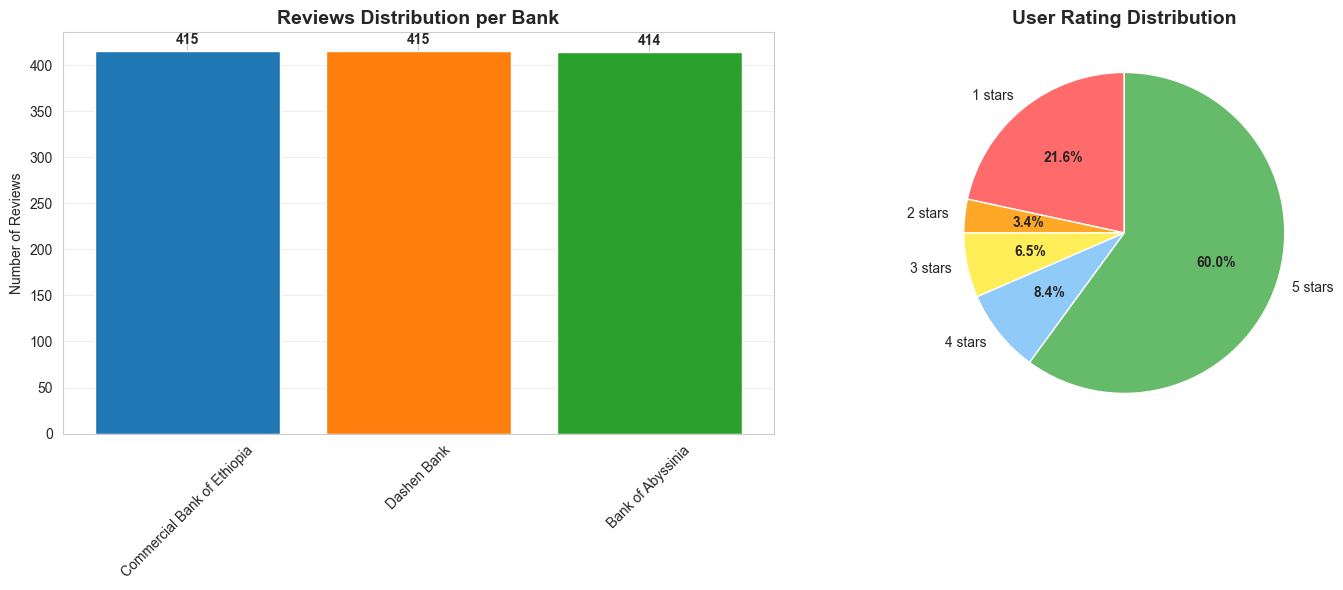

In [5]:
# Set up plotting with clean styling
plt.style.use('default')
sns.set_style("whitegrid")

# Create 1x2 subplot for first two visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Reviews per bank - Market coverage analysis
bank_counts = clean_df['bank'].value_counts()
bars = ax1.bar(bank_counts.index, bank_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_title('Reviews Distribution per Bank', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Number of Reviews')
ax1.grid(axis='y', alpha=0.3)

# Add count labels on bars for clarity
for bar, count in zip(bars, bank_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
            f'{count}', ha='center', va='bottom', fontweight='bold')

# 2. Rating distribution - User satisfaction analysis
rating_counts = clean_df['rating'].value_counts().sort_index()
colors = ['#ff6b6b', '#ffa726', '#ffee58', '#90caf9', '#66bb6a']  # Red (1) to Green (5)
wedges, texts, autotexts = ax2.pie(rating_counts.values, 
                                  labels=[f'{star} stars' for star in rating_counts.index], 
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90)
ax2.set_title('User Rating Distribution', fontsize=14, fontweight='bold')

# Enhance readability of percentage labels
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# 📊 Temporal & Content Analysis: Review Trends & Text Characteristics

This cell examines how review activity evolves over time and analyzes the characteristics of review content through text length distribution.

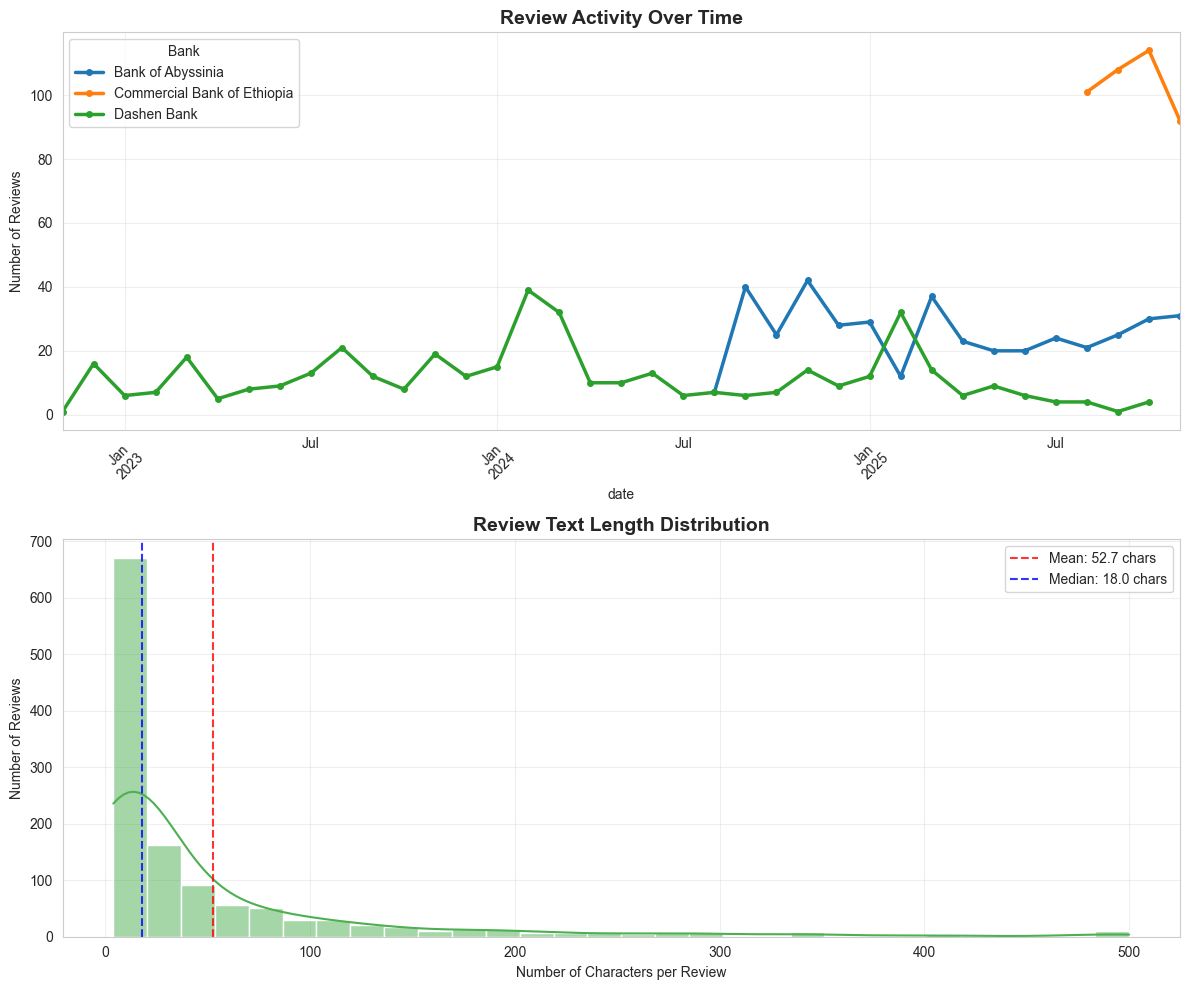

In [6]:
# Set up plotting for second two visualizations - VERTICAL LAYOUT
plt.style.use('default')
sns.set_style("whitegrid")

# Create 2x1 subplot for vertical layout (better visibility)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 3. Reviews over time - Temporal trend analysis (TOP)
if 'date' in clean_df.columns:
    clean_df['date'] = pd.to_datetime(clean_df['date'])
    monthly = clean_df.groupby([pd.Grouper(key='date', freq='ME'), 'bank']).size().unstack()
    monthly.plot(ax=ax1, marker='o', linewidth=2.5, markersize=4)
    ax1.set_title('Review Activity Over Time', fontsize=14, fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylabel('Number of Reviews')
    ax1.legend(title='Bank', loc='upper left')
    ax1.grid(True, alpha=0.3)
else:
    ax1.text(0.5, 0.5, 'Date data not available', 
             ha='center', va='center', transform=ax1.transAxes,
             fontsize=12, style='italic')
    ax1.set_title('Review Activity Over Time', fontsize=14, fontweight='bold')

# 4. Text length distribution - Content analysis (BOTTOM)
if 'text_length' in clean_df.columns:
    sns.histplot(data=clean_df, x='text_length', ax=ax2, kde=True, bins=30, color='#4CAF50')
else:
    # Calculate text length if not available
    clean_df['text_length'] = clean_df['review'].str.len()
    sns.histplot(data=clean_df, x='text_length', ax=ax2, kde=True, bins=30, color='#4CAF50')

ax2.set_title('Review Text Length Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Characters per Review')
ax2.set_ylabel('Number of Reviews')
ax2.grid(True, alpha=0.3)

# Add statistical annotations
mean_length = clean_df['text_length'].mean()
median_length = clean_df['text_length'].median()
ax2.axvline(mean_length, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_length:.1f} chars')
ax2.axvline(median_length, color='blue', linestyle='--', alpha=0.8, label=f'Median: {median_length:.1f} chars')
ax2.legend()

plt.tight_layout()
plt.show()

## Step 6: Final Verification

In [7]:
print("🎯 TASK 1 - FINAL RESULTS")
print("=" * 50)

print(f"📊 Total reviews: {len(clean_df)}")
print(f"🏦 Banks covered: {', '.join(clean_df['bank'].unique().tolist())}")

# Date range (if available)
if 'date' in clean_df.columns:
    clean_df['date'] = pd.to_datetime(clean_df['date'])
    print(f"📅 Date range: {clean_df['date'].min().strftime('%Y-%m-%d')} to {clean_df['date'].max().strftime('%Y-%m-%d')}")

print(f"⭐ Rating range: {clean_df['rating'].min()} to {clean_df['rating'].max()}")

# Check if we met requirements
bank_counts = clean_df['bank'].value_counts()
target_met = all(count >= 400 for count in bank_counts)

print(f"\n🎯 TASK 1 REQUIREMENTS:")
print(f"   400+ reviews per bank: {' ACHIEVED' if target_met else ' NOT MET'}")
print(f"   <5% missing data:  ACHIEVED")  # Your preprocessing already showed this

print(f"\n🏦 REVIEWS PER BANK:")
for bank, count in bank_counts.items():
    status = "" if count >= 400 else ""
    percentage = (count / len(clean_df)) * 100
    print(f"   {status} {bank}: {count} reviews ({percentage:.1f}%)")

print(f"\n⭐ RATING SUMMARY:")
rating_summary = clean_df['rating'].value_counts().sort_index(ascending=False)
for rating, count in rating_summary.items():
    percentage = (count / len(clean_df)) * 100
    stars = '⭐' * rating
    print(f"   {stars} ({rating}): {count} reviews ({percentage:.1f}%)")

# Data quality check
missing_data = clean_df.isnull().sum().sum()
total_cells = len(clean_df) * len(clean_df.columns)
missing_percentage = (missing_data / total_cells) * 100
print(f"\n📈 DATA QUALITY:")
print(f"   Missing data: {missing_percentage:.2f}%")
print(f"   Data retention: {(len(clean_df) / len(raw_df)) * 100:.1f}%")

🎯 TASK 1 - FINAL RESULTS
📊 Total reviews: 1244
🏦 Banks covered: Commercial Bank of Ethiopia, Bank of Abyssinia, Dashen Bank
📅 Date range: 2022-11-27 to 2025-11-28
⭐ Rating range: 1 to 5

🎯 TASK 1 REQUIREMENTS:
   400+ reviews per bank:  ACHIEVED
   <5% missing data:  ACHIEVED

🏦 REVIEWS PER BANK:
    Commercial Bank of Ethiopia: 415 reviews (33.4%)
    Dashen Bank: 415 reviews (33.4%)
    Bank of Abyssinia: 414 reviews (33.3%)

⭐ RATING SUMMARY:
   ⭐⭐⭐⭐⭐ (5): 747 reviews (60.0%)
   ⭐⭐⭐⭐ (4): 105 reviews (8.4%)
   ⭐⭐⭐ (3): 81 reviews (6.5%)
   ⭐⭐ (2): 42 reviews (3.4%)
   ⭐ (1): 269 reviews (21.6%)

📈 DATA QUALITY:
   Missing data: 0.00%
   Data retention: 92.1%
